# Mango variant visualization tools 
bdgenomics.mango.variantViz

Note: where “population” is required as a parameters such as “AF_AFR” - allele frequency African/African American, see list of populations at: https://macarthurlab.org/2017/02/27/the-genome-aggregation-database-gnomad/

### Load data

In [ ]:
%matplotlib inline
from bdgenomics.adam.adamContext import ADAMContext
from bdgenomics.adam.rdd import AlignmentRecordRDD, CoverageRDD
import matplotlib.pyplot as plt
ac = ADAMContext(spark)
data = ac.loadVariants("../../mango-core/src/test/resources/exome_chr22.adam")
data_geno = ac.loadGenotypes("../../mango-core/src/test/resources/geno.test1.adam")

### Plot variant density across chromosome region

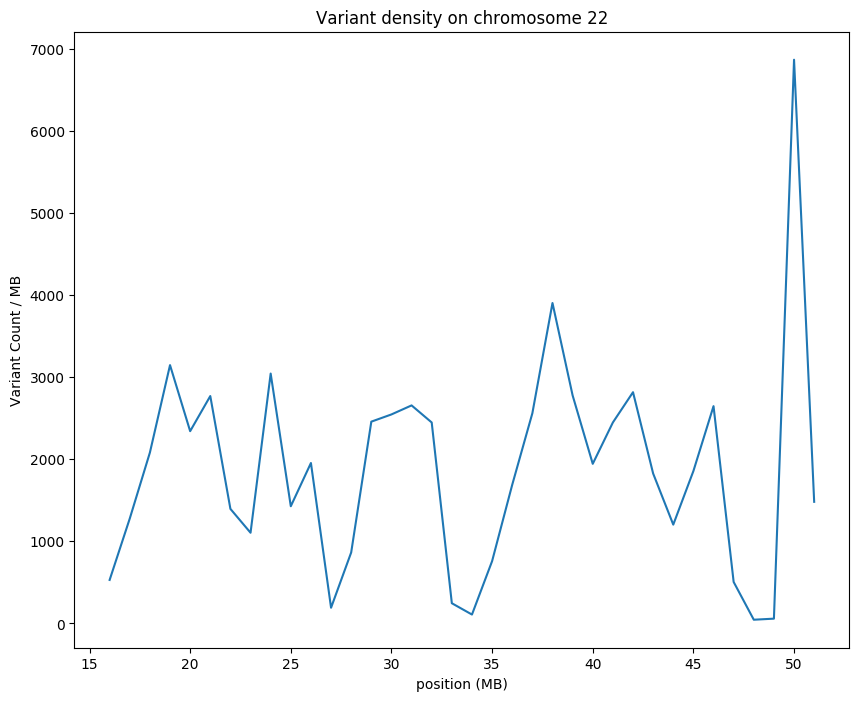

In [2]:
from bdgenomics.mango.variantViz import VariantDensityDistribution

#Retrieve position binned density
contigName="22"
varDensityData = VariantDensityDistribution(spark,data, start=0, end=1000000000,contigName=contigName)
position_bin, variant_count = varDensityData.plot()

#Plot
plt.plot( position_bin, variant_count)
plt.title("Variant density on chromosome " + contigName)
plt.xlabel("position (MB)")
plt.ylabel("Variant Count / MB")
plt.show()

### Plot Histogram of Quality By Depth (QD) score from a variant dataset

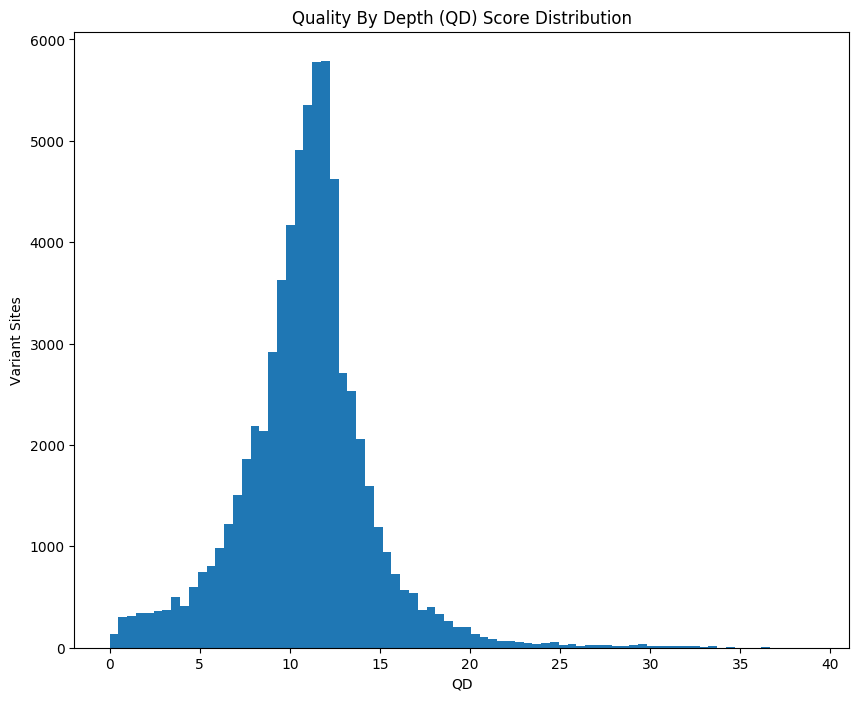

In [3]:
from bdgenomics.mango.variantViz import QualityByDepthDistribution

graphData = QualityByDepthDistribution(spark,data).plot()

plt.hist(graphData.keys(),weights=graphData.values(),bins=80)
plt.title("Quality By Depth (QD) Score Distribution")
plt.xlabel("QD")
plt.ylabel("Variant Sites")
plt.show()

### Plot Histogram of the heterozygote/homozygote genotype ratio

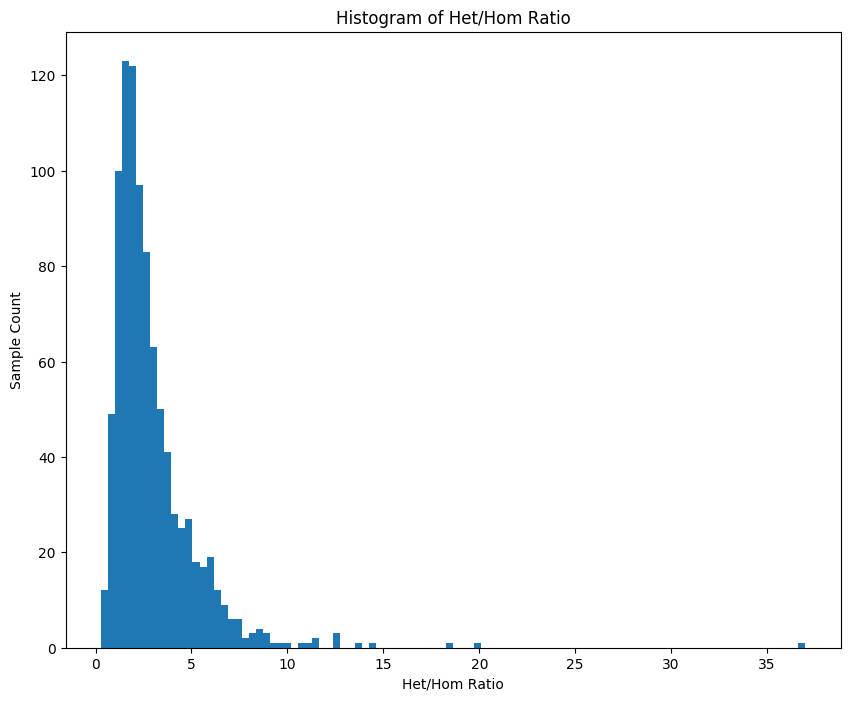

In [4]:
from bdgenomics.mango.variantViz import HetHomRatioDistribution

graphData = HetHomRatioDistribution(spark, data_geno).plot()

plt.hist(graphData,bins=100)
plt.title("Histogram of Het/Hom Ratio")
plt.xlabel("Het/Hom Ratio")
plt.ylabel("Sample Count")
plt.show()


### Plot histogram of callrate per sample

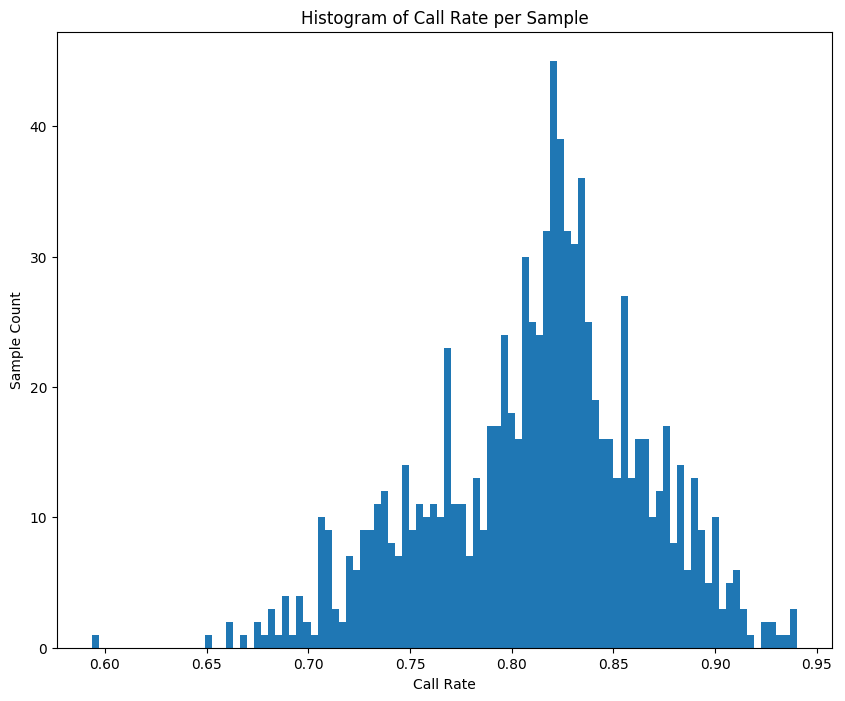

In [5]:
from bdgenomics.mango.variantViz import GenotypeCallRatesDistribution

# compute graph data
graphData = GenotypeCallRatesDistribution(spark,data_geno).plot()

# Plot graph
plt.hist(graphData,100)
plt.title("Histogram of Call Rate per Sample")
plt.xlabel("Call Rate")
plt.ylabel("Sample Count")
plt.show()



In [6]:
### Plot histogram of Variant Count per Sample

In [ ]:
from bdgenomics.mango.variantViz import VariantsPerSampleDistribution

# compute graph data
graphData = VariantsPerSampleDistribution(spark,data_geno).plot()

# Plot graph
plt.hist(graphData,100)
plt.title("Histogram of Variant Count per Sample")
plt.xlabel("Number of Variants")
plt.ylabel("Count of Samples")
plt.show()
